<a href="https://colab.research.google.com/github/bjentwistle/PythonFundamentals/blob/main/Projects/Final_Sea_Level_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Sea Level Project - correlation between time data and sea level rise and future predictions.
---

### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise

The data describes annual sea levels from 1880 to 2013.  Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)  

Raw Data file:  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv

For this exercise:
*  import the pandas library
*  import the numpy library
*  read the csv dataset containing data on sea-levels from the year 1880 to 2013 into a dataframe (df)
*  use df.head() and df.info() to inspect the data and the column data types



In [84]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv"
sea_levels = pd.read_csv(url)

sea_levels.head()
#sea_levels.info()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


The dataset shows:

The Year in column 1 and describes the	year of measurement as an int64 (YYYY).

Column 2 is the CSIRO (Commonwealth Scientific and Industrial Research Organization) Adjusted Sea Level (as a float64), this is the comulative changes (in inches) in sea level for the world’s oceans based on the combination of long-term tide gauge measurements and recent satellite measurements.

Column 3 shows the Lower Error Bound in	inches

Colun 4 shows the Upper Error Bound in inches

Finally, column 5 shows the NOAA (National Oceanic and Atmospheric Administration) Adjusted Sea Level 	5 	number 	inches (not all rows have data hereas it was only established in .)
Further explanation can be found at this link - https://datahub.io/core/sea-level-rise#readme

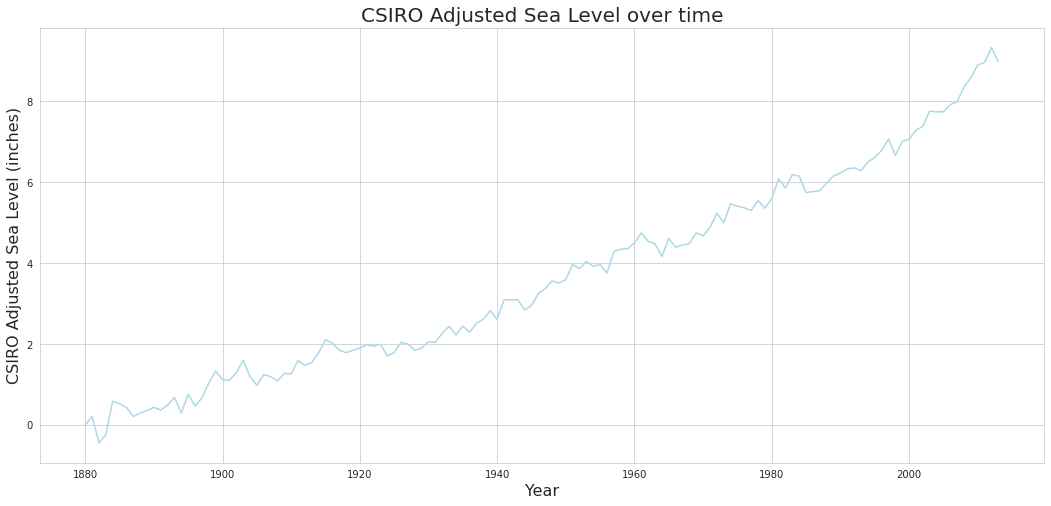

In [85]:
import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt

def display_lineplot(df, column):
  #create a subset of the df using only the net_per_10K columns and find their means.
  data = df
  
  #plot the chart of the data means and get labels from the years column
  plt.figure(figsize=(18, 8))
  chart = sns.lineplot(data=data,y = column, x="Year", color='lightblue')
  plt.title("CSIRO Adjusted Sea Level over time", fontsize=20)
  plt.xlabel("Year", fontsize=16)
  plt.ylabel("CSIRO Adjusted Sea Level (inches)", fontsize=16)
  sns.set_style("whitegrid")

display_lineplot(sea_levels, "CSIRO Adjusted Sea Level")

### Then
---
1.  Calculate some statistics on the level array, eg:
*  mean
*  standard deviation
*  total 

2.  Use the fact that the arrays are aligned (e.g. the first number in the level array is linked to the first year in the year array and display:

*  the year with the biggest rise in level
*  the year with the lowest rise in level

3.  Calculate the Pearson product-moment correlation coefficient between year and the rise in sea level.  (*Expected output:  0.98 when rounded to 2 decimal places*)

In [86]:
#Create numpy arrays for the sea levels by CSIRO and the years.
sea_levels_array = sea_levels['CSIRO Adjusted Sea Level'].to_numpy(np.float32)
years_array = sea_levels['Year'].to_numpy(np.float16)


#Calculate some statistics for sea levels - mean and stnadard deviation.
mean_sea_levels = sea_levels_array.mean()
stand_dev = np.std(sea_levels_array)
print("Average increase:", mean_sea_levels)
print("Sandard Deviation:", stand_dev)

#Work out which year had the maximun increase in sea levels and print that year.
max_increase = sea_levels_array.max()
year_max = np.where(sea_levels_array == max_increase)
print(int(years_array[year_max]),"had the maximun sea level increase of ", max_increase)

#Work out which year had the minimum increase in sea levels and print that year.
min_increase = sea_levels_array.min()
year_min = np.where(sea_levels_array == min_increase)
print(int(years_array[year_min]),"had the minimum sea level increase of ", min_increase)

#Work out the Pearson Correlation Coefficient for the sea levels realted to the year.
corr_coeff = np.corrcoef(years_array, sea_levels_array)
print("The correlation coefficiant between time and levels = ", corr_coeff[1,0])

Average increase: 3.650341
Sandard Deviation: 2.4763997
2012 had the maximun sea level increase of  9.326772
1882 had the minimum sea level increase of  -0.44094488
The correlation coefficiant between time and levels =  0.9847571304507764


Regression slope =  0.0630445840121348
Regression intercept = -119.06594196773978
R value =  0.984757131182585


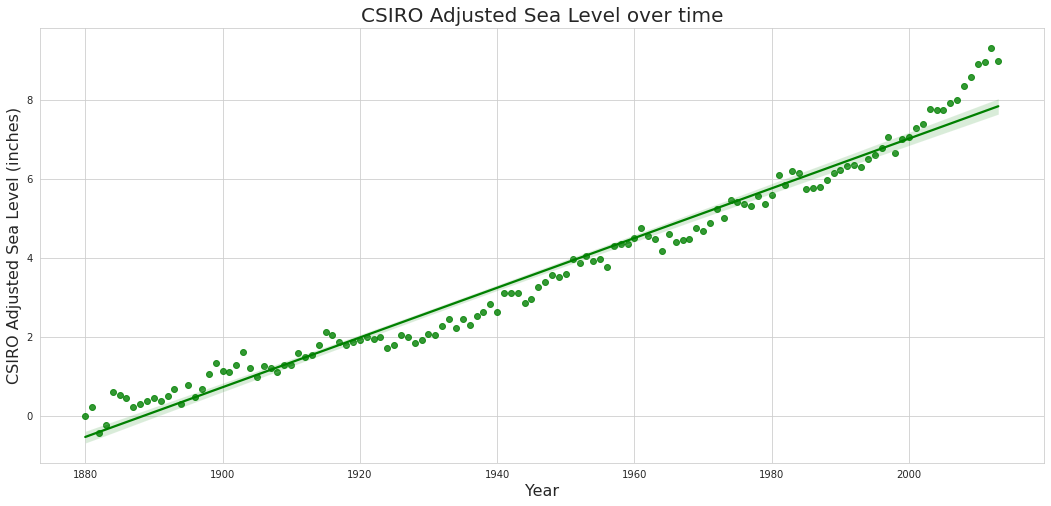

In [88]:
# Linear regression to get the slope and intercept of the data so I can use it to make a prediction 
# of sea levels in the future.

#linear regression function needed to plot line of best fit to predict future page views
def get_lineregress(df,x,y):
  regression = linregress(x,y)
  print("Regression slope = ", regression.slope)
  print("Regression intercept =", regression.intercept)
  print("R value = ", regression[2])
  
  #set figure size before plotting
  plt.figure(figsize=(18, 8))
  chart=sns.regplot(x=x, y=y, color = 'g')
  plt.title("CSIRO Adjusted Sea Level over time", fontsize=20)
  plt.xlabel("Year", fontsize=16)
  plt.ylabel("CSIRO Adjusted Sea Level (inches)", fontsize=16)
 
  return regression

regression = get_lineregress(sea_levels, x = sea_levels["Year"],  y = sea_levels["CSIRO Adjusted Sea Level"])

Visibily it can be seen that the data points are tending upwards in a sharper slope from around year 2000 onwards. The NOAA states on it's site that "Global tidal records from 1900 to 1990 show an estimated  4- to 5-inch rise in global mean sea level. Then, in the 25 years from 1990 to 2015, this global tide gauge network showed global sea level rising 3 inches" From NOAA Tracking sea level rise ... and fall page https://www.noaa.gov/explainers/tracking-sea-level-rise-and-fall

Hence, I will filter the data from 1990 onwards to see if the increase is more pronounced in these later decades. Then I will use this new linear regression slope to make predictions on future sea levels.


Regression slope =  0.137246739763834
Regression intercept = -267.2186748294566
R value =  0.9794395519430028


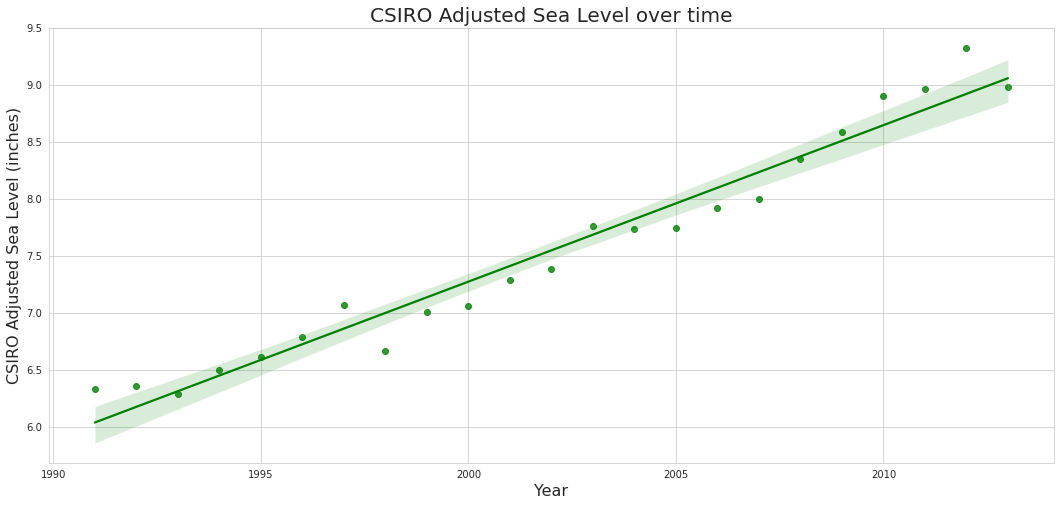

In [89]:
#Filter data from the year data 1990 onwards for new linear regression calculation.
def drop_early_years(df,year):

  new_df = df[df.Year > year]
  return new_df

new_df = drop_early_years(sea_levels, 1990)

#Plot the new dataframe from 1990 onwards to see if the slope has increased in gradient

new_regression = get_lineregress(new_df, x = new_df["Year"],  y = new_df["CSIRO Adjusted Sea Level"])


The slope gradient has indeed increased from 0.063 to 0.137 (rounded to 3 decimal places). This is inline with the NOAA's findings. The sea levels are rising at a much faster rate around the turn of this centurycompared to the earlier decades of 20th century. 

To make predictions for the sea levels in the future I need to extend the line of best fit for future years.


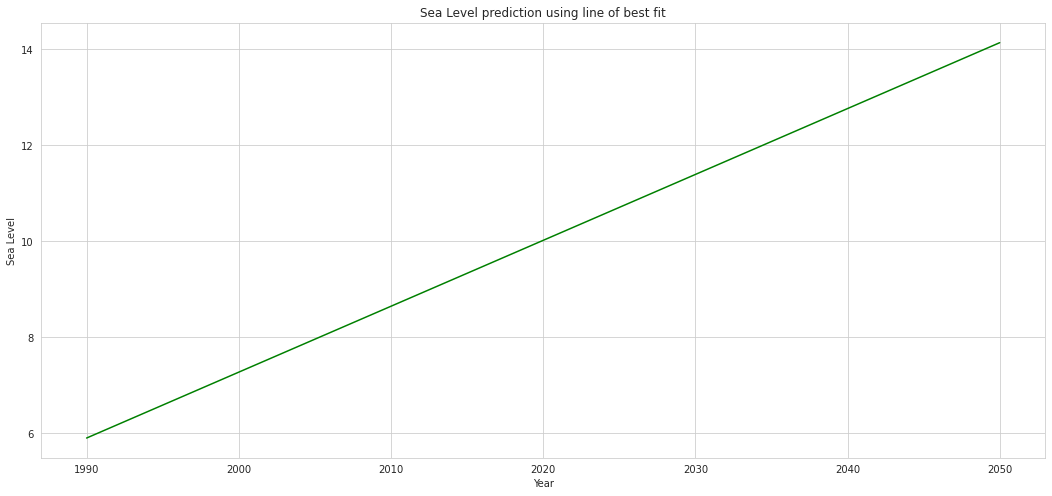

In [90]:
#setting the years range from 2015 to a future year of 2035 and plot using regression output
def sealevel_prediction_plot():
  guesstimate = np.arange(1990,2051)
  plt.figure(figsize=(18, 8))
  plt.plot(guesstimate, -267.2186748294566 + 0.137246739763834*guesstimate, 'g', label='fitted line')
  plt.title("Sea Level prediction using line of best fit")
  plt.xlabel("Year")
  plt.ylabel("Sea Level");

sealevel_prediction_plot()

## This prediction line shows that the sea levels could have risen by over 14 inches by the year 2050!

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer: 

## What caused you the most difficulty?

Your answer: 